In [207]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [208]:
print(cv2.__version__)
print(np.__version__)

4.8.0
1.21.6


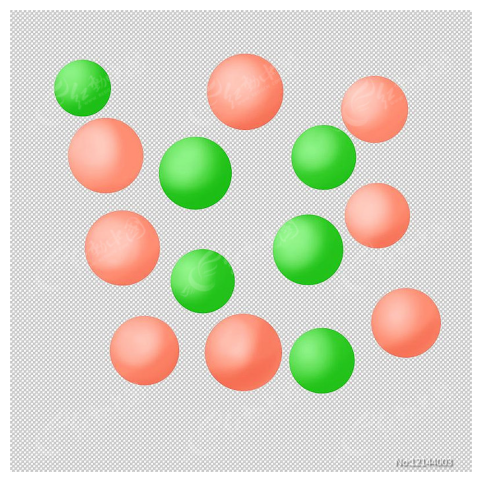

In [209]:
file_path = "./images/red_and_green_circles.jpg"
pic = cv2.imread(file_path,flags=cv2.IMREAD_COLOR)


plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(pic,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 分割红色与绿色物体

Text(0.5, 1.0, 'green_mask')

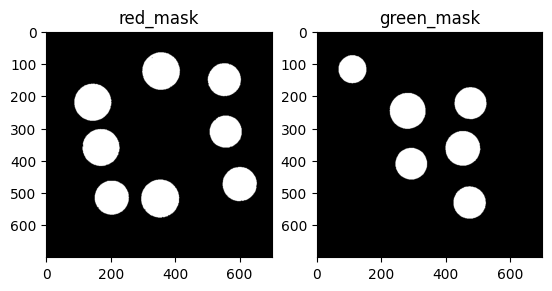

In [210]:
hsv_pic = cv2.cvtColor(pic,cv2.COLOR_BGR2HSV)

# 色相表示颜色
lower_red = np.array([0,50,50])
upper_red = np.array([20,255,255])

lower_green = np.array([50,50,50])
upper_green = np.array([70,255,255])

red_mask = cv2.inRange(hsv_pic,lower_red,upper_red)
green_mask = cv2.inRange(hsv_pic,lower_green,upper_green)

plt.subplot(1,2,1)
plt.imshow(red_mask,cmap="gray")
plt.title('red_mask')

plt.subplot(1,2,2)
plt.imshow(green_mask,cmap="gray")
plt.title('green_mask')

In [211]:
red_mask.shape

(700, 700)

### 霍夫圆检测
```

 circles = cv2.HoughCircles(
    image,          # 输入的单通道灰度图像
    method,         # 检测方法，通常使用 cv2.HOUGH_GRADIENT
    dp,             # 累加器图像分辨率与原始图像分辨率的比例（通常为1）
    minDist,        # 检测到的圆之间的最小距离
    param1,         # Canny 边缘检测的高阈值
    param2,         # 累加器阈值，用于确定圆的候选点
    minRadius,      # 圆的最小半径
    maxRadius       # 圆的最大半径
)

```

In [212]:
red_circles = cv2.HoughCircles(red_mask,
                               cv2.HOUGH_GRADIENT,
                               dp=1,
                               minDist=60,
                               param1=50,
                               param2=14,
                               minRadius=30,
                               maxRadius=200)

green_circles = cv2.HoughCircles(green_mask,
                               cv2.HOUGH_GRADIENT,
                               dp=1,
                               minDist=60,
                               param1=50,
                               param2=14,
                               minRadius=30,
                               maxRadius=200)

In [213]:
red_circles.shape

(1, 8, 3)

In [214]:
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
if red_circles is not None:
    red_circles = np.uint16(np.around(red_circles))
    for circle in red_circles[0,:]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(pic,center, radius,(255,0,0),6)

if green_circles is not None:
    green_circles = np.uint16(np.around(green_circles))
    for circle in green_circles[0,:]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(pic,center, radius,(0,255,0),6)

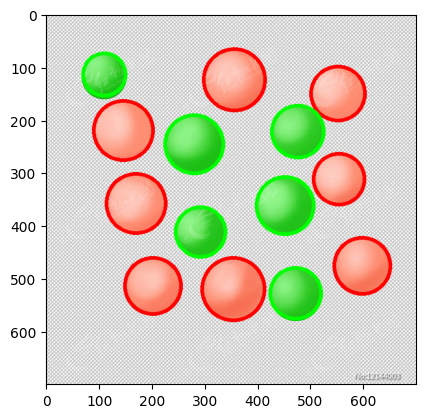

In [215]:
plt.imshow(pic)